Створити нейронну мережу (модель) з використанням згорткових шарів для датасета cifar 10 (mnist, fasion mnist).

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np

Завантаження датасету та виведення перших 10 рядків

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


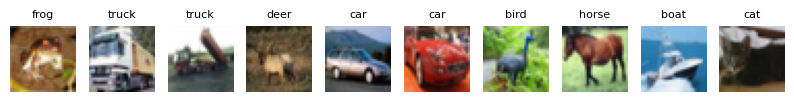

In [24]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=8)
    plt.axis('off')
plt.show()

Підготовка даних

In [8]:
# Нормалізація даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перетворення міток у one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Створення архітектури моделі

In [16]:
model = models.Sequential()

# Перший блок згорткових шарів
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Другий блок згорткових шарів
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Третій блок згорткових шарів
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Фінальні шари
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Оптимізатор
optimizer = tf.keras.optimizers.Adam()

# Компіляція моделі
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [8]:
# Навчання моделі
history = model.fit(x_train, y_train, epochs=30, batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 91ms/step - accuracy: 0.2704 - loss: 1.9309 - val_accuracy: 0.4748 - val_loss: 1.4990 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.4988 - loss: 1.3872 - val_accuracy: 0.5904 - val_loss: 1.1464 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.5782 - loss: 1.1999 - val_accuracy: 0.6304 - val_loss: 1.0585 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 93ms/step - accuracy: 0.6214 - loss: 1.0770 - val_accuracy: 0.6350 - val_loss: 1.0332 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.6524 - loss: 0.9977 - val_accuracy: 0.6708 - val_loss: 0.9369 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 89ms/step - accuracy: 0.6768 - loss: 0.9269 - val_accuracy: 0.6831 - val_loss: 0.9078 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7003 - l

Код завершився на 18 епосі тому, що за останні 5 епох показник val_loss не покращувався

In [10]:
#Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 480,608 (1.83 MB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,406 (1.22 MB)

Побудова графіків втрат і точності

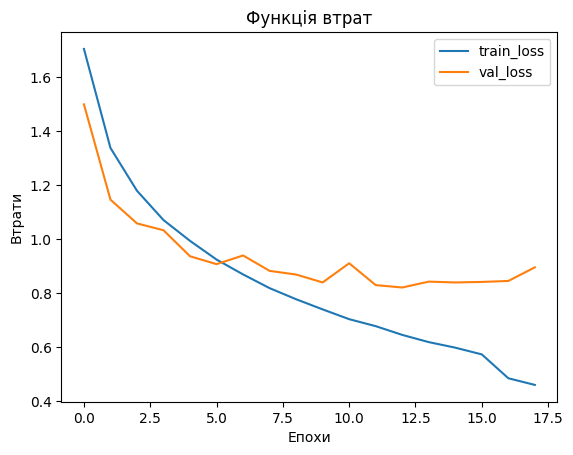

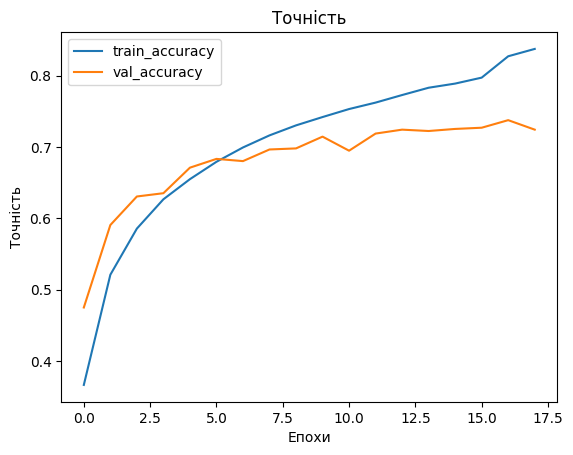

In [11]:
# Графік втрат
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

# Графік точності
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

Класифікаційний звіт

In [18]:
# Прогнозування на тестових даних
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [12]:
# Класифікаційний звіт
print(classification_report(y_true, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

    airplane       0.76      0.74      0.75      1000
         car       0.86      0.81      0.83      1000
        bird       0.66      0.58      0.62      1000
         cat       0.54      0.50      0.52      1000
        deer       0.67      0.71      0.69      1000
         dog       0.65      0.62      0.64      1000
        frog       0.74      0.84      0.79      1000
       horse       0.77      0.74      0.76      1000
        boat       0.80      0.85      0.82      1000
       truck       0.76      0.86      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



Візуалізація розпізнавання

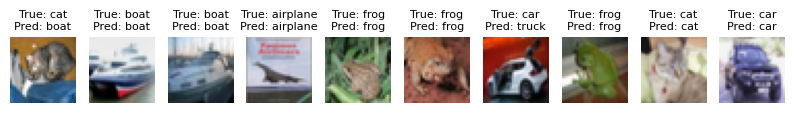

In [13]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred_classes[i]]}", fontsize=8)
    plt.axis('off')
plt.show()

 Побудова моделі VGG16

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

# Додаємо власні шари
model_vgg = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Навчання з використанням callbacks

In [11]:
history_vgg = model_vgg.fit(x_train, y_train, epochs=30, batch_size=32,
                            validation_data=(x_test, y_test),
                            callbacks=[early_stopping, reduce_lr])

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.3896 - loss: 1.7182 - val_accuracy: 0.5375 - val_loss: 1.3229 - learning_rate: 0.0010
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.5266 - loss: 1.3546 - val_accuracy: 0.5706 - val_loss: 1.2376 - learning_rate: 0.0010
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5483 - loss: 1.2900 - val_accuracy: 0.5777 - val_loss: 1.2038 - learning_rate: 0.0010
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5612 - loss: 1.2525 - val_accuracy: 0.5864 - val_loss: 1.1884 - learning_rate: 0.0010
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5679 - loss: 1.2428 - val_accuracy: 0.5847 - val_loss: 1.1777 - learning_rate: 0.0010
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5756 - loss: 1.2053 - val_accuracy: 0.5879 - val_loss: 1.1761 - learning_rate: 0.0010
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.

Виведення summary

In [12]:
model_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,915,552 (56.90 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 133,910 (523.09 KB)

Побудова графіків функції втрат і точності

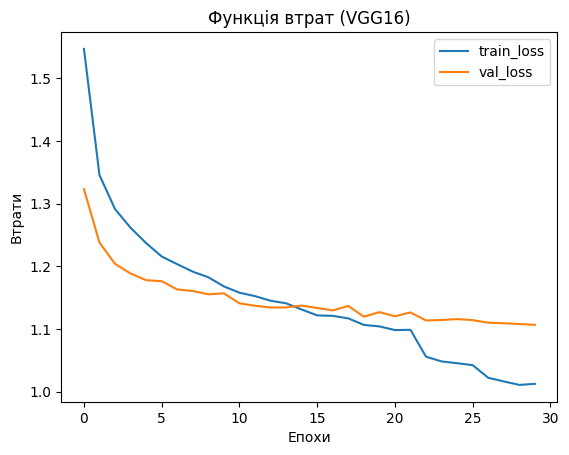

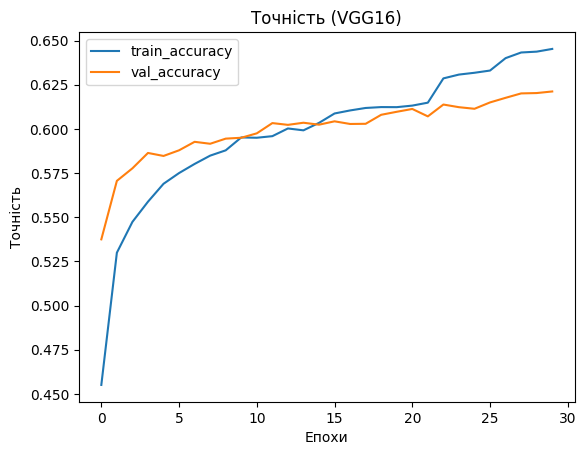

In [13]:
# Графік втрат
plt.plot(history_vgg.history['loss'], label='train_loss')
plt.plot(history_vgg.history['val_loss'], label='val_loss')
plt.title('Функція втрат (VGG16)')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

# Графік точності
plt.plot(history_vgg.history['accuracy'], label='train_accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='val_accuracy')
plt.title('Точність (VGG16)')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

Класифікаційний звіт

In [25]:
y_pred_vgg = model_vgg.predict(x_test)
y_pred_classes_vgg = np.argmax(y_pred_vgg, axis=1)

# Класифікаційний звіт для VGG16
print(classification_report(y_true, y_pred_classes_vgg, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

    airplane       0.32      0.79      0.46      1000
         car       0.26      0.69      0.37      1000
        bird       0.45      0.13      0.20      1000
         cat       0.31      0.18      0.23      1000
        deer       0.83      0.01      0.02      1000
         dog       0.34      0.41      0.37      1000
        frog       0.65      0.07      0.13      1000
       horse       0.48      0.29      0.36      1000
        boat       0.36      0.34      0.35      1000
       truck       0.37      0.41      0.39      1000

    accuracy                           0.33     10000
   macro avg       0.44      0.33      0.29     10000
weighted avg       0.44      0.33      0.29     10000



Візуалізація розпізнавання

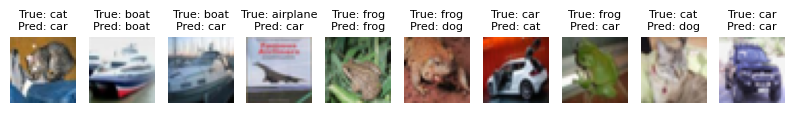

In [27]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred_classes_vgg[i]]}", fontsize=8)
    plt.axis('off')
plt.show()

Висновки
У даній роботі було проаналізовано роботу нейронної мережі для класифікації зображень на основі датасету CIFAR-10
Найкращі результати класифікації модель показала для:
Автомобілів (car): **precision 0.86, F1-score 0.83**
Вантажівок (truck): **recall 0.86, F1-score 0.81**
Човнів (boat): **F1-score 0.82**
Найгірші результати для:
Котів (cat): найнижчі показники **precision (0.54), recall (0.50) і F1-score (0.52)**
Птахів (bird): відносно низькі показники **(precision 0.66, F1-score 0.62))**
Модель VGG16 хоч пройшла 30 батчів без погіршення val_loss останні 5 батчів, показує доволі низьку точність в класифікації зображень.